In [13]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression

from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor


# Data Preprocessing

In [2]:
# data set

data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exam_2.0/BigMart_Train.csv')

df= data_frame.copy()
df_lgb = data_frame.copy()


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,1
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# filling NUll value


for col in df.columns:
  if df[col].isnull().sum()>0:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<ipython-input-5-724fa0ef0cb0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-5-724fa0ef0cb0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [6]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [7]:
# categorical -> numerical


categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
cordinalaty = df[categorical_col].nunique()

cordinalaty

,0
Item_Identifier,1559
Item_Fat_Content,6
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [9]:
onehot_col = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
label_col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']



In [10]:
# Label encoding

lab_encod = LabelEncoder()
for col in label_col:
  df[col] = lab_encod.fit_transform(df[col])



In [11]:
#One-hot encoding

one_encode = OneHotEncoder()
encoded_col = one_encode.fit_transform(df[onehot_col])
encode_df = pd.DataFrame(encoded_col.toarray(), columns=one_encode.get_feature_names_out(onehot_col))

df = df.drop(columns=onehot_col)
df = pd.concat([df, encode_df], axis=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   int64  
 1   Item_Weight                    8523 non-null   float64
 2   Item_Fat_Content               8523 non-null   int64  
 3   Item_Visibility                8523 non-null   float64
 4   Item_Type                      8523 non-null   int64  
 5   Item_MRP                       8523 non-null   float64
 6   Outlet_Identifier              8523 non-null   int64  
 7   Outlet_Establishment_Year      8523 non-null   int64  
 8   Item_Outlet_Sales              8523 non-null   float64
 9   Outlet_Size_High               8523 non-null   float64
 10  Outlet_Size_Medium             8523 non-null   float64
 11  Outlet_Size_Small              8523 non-null   float64
 12  Outlet_Location_Type_Tier 1    8523 non-null   f

In [13]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300000,2,0.016047,4,249.8092,9,1999,3735.1380,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,5.920000,3,0.019278,14,48.2692,3,2009,443.4228,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,17.500000,2,0.016760,10,141.6180,9,1999,2097.2700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,19.200000,3,0.000000,6,182.0950,0,1998,732.3800,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,8.930000,2,0.000000,9,53.8614,1,1987,994.7052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,758,10.395000,3,0.000000,0,51.4008,3,2009,556.6088,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,696,13.650000,3,0.012741,13,57.6588,1,1987,343.5528,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,738,12.857645,2,0.127470,13,107.7622,5,1985,4022.7636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,440,16.200000,3,0.016687,5,96.9726,7,2002,1076.5986,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,990,19.200000,3,0.094450,5,187.8214,2,2007,4710.5350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


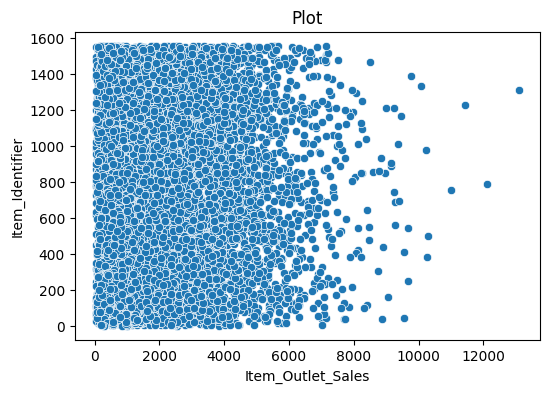

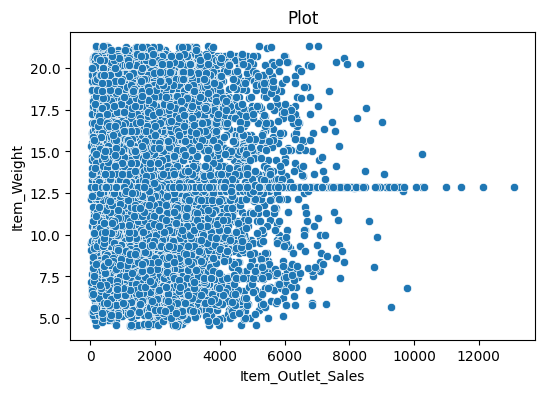

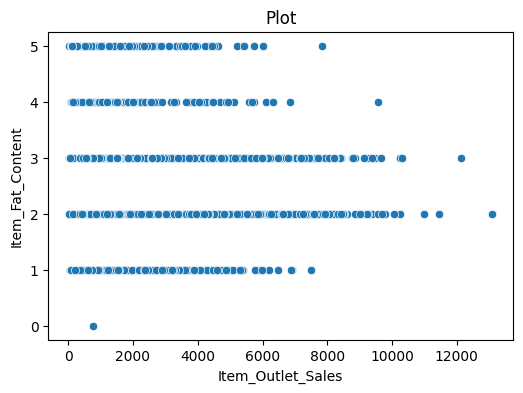

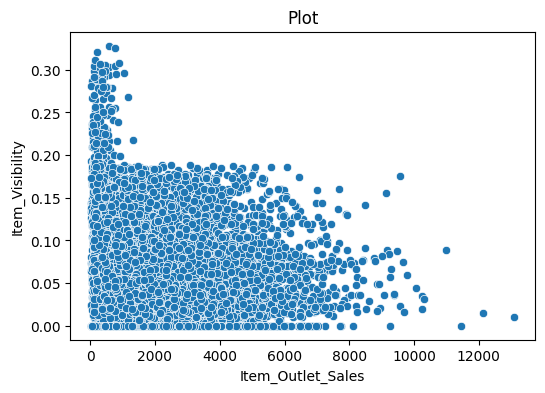

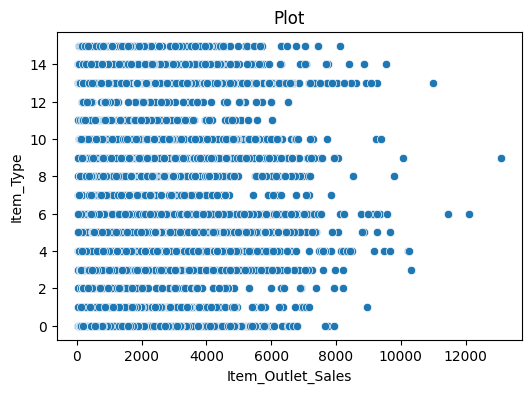

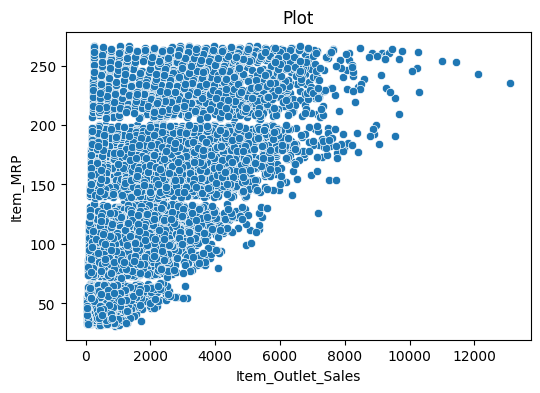

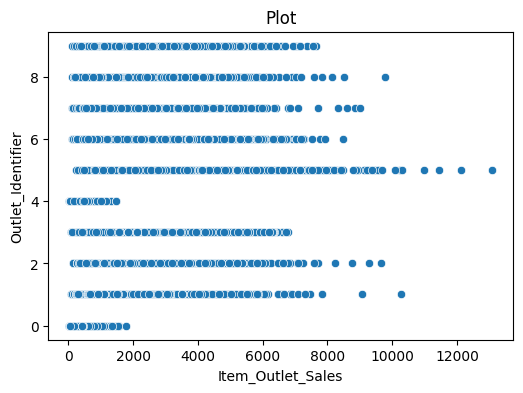

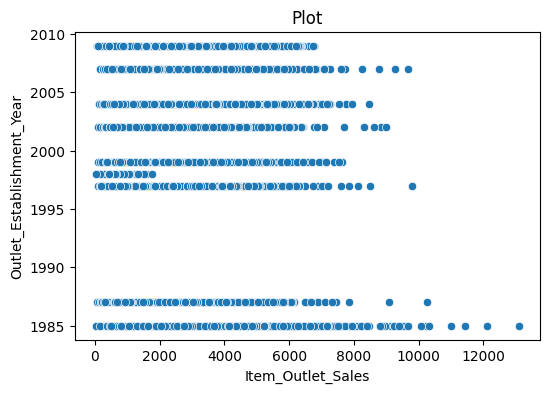

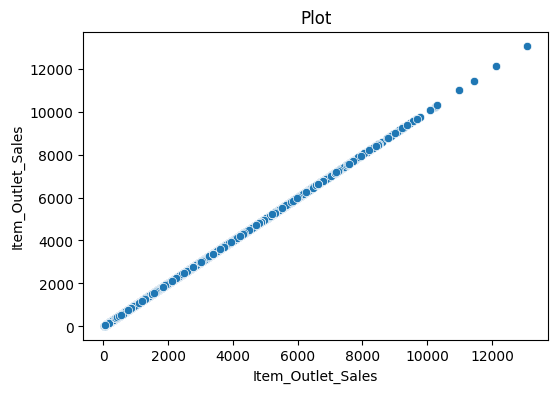

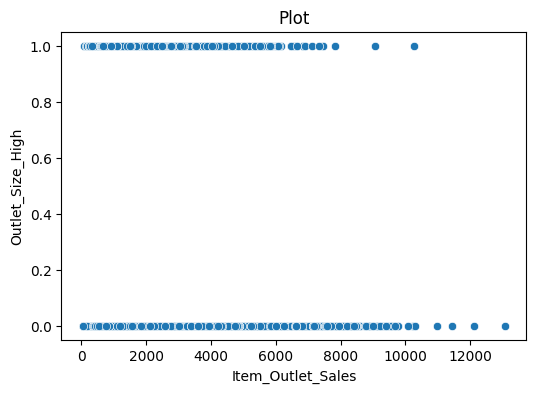

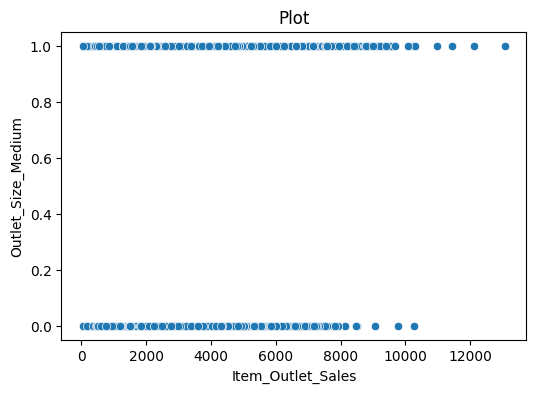

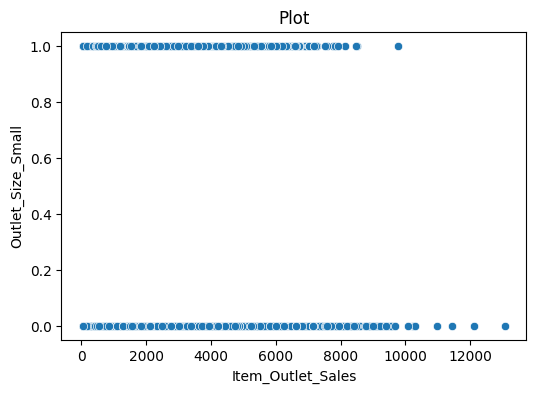

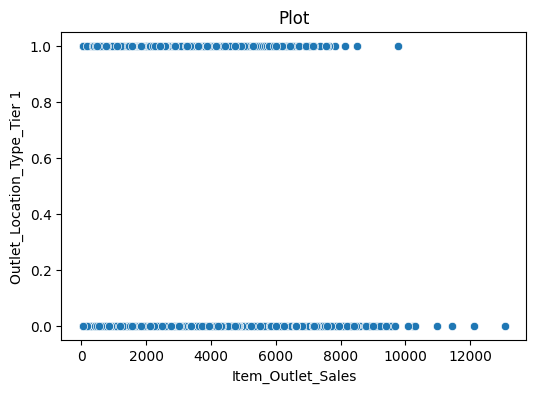

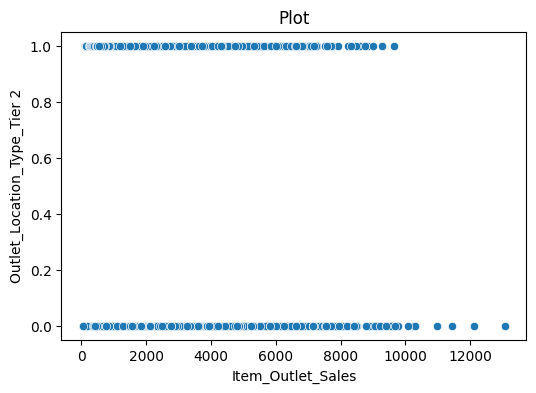

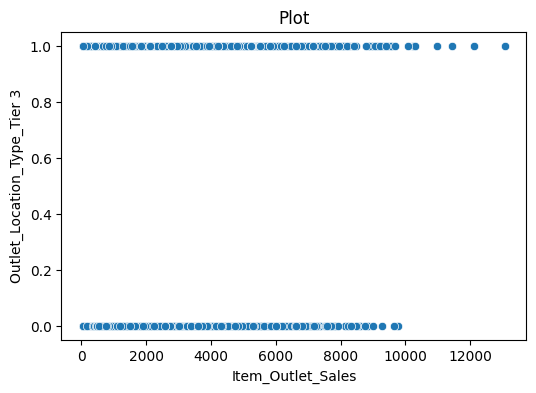

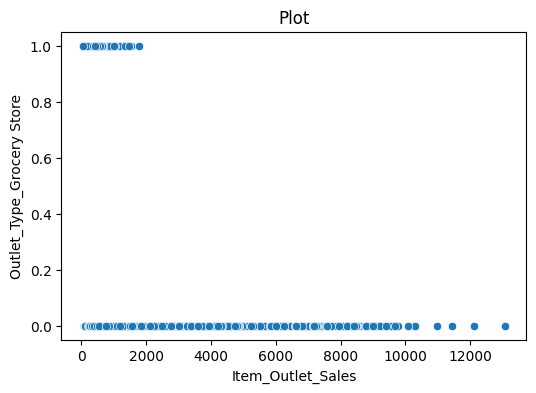

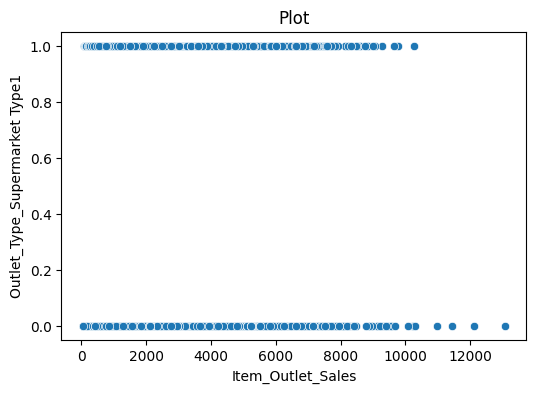

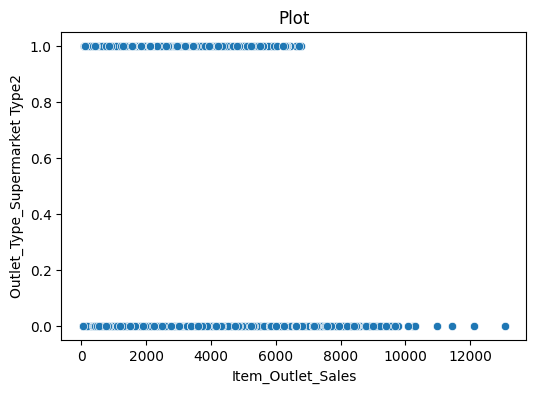

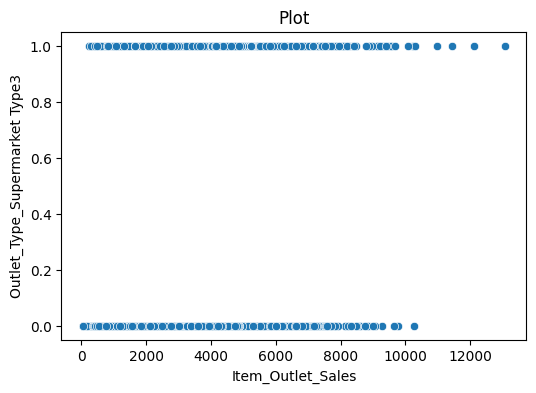

In [14]:
def plot_relation(df, colm):
  for i in range(len(colm)):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Item_Outlet_Sales', y=colm[i])
    plt.title('Plot')
    plt.show()

plot_relation(df, df.columns)


In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,2,0.016047,4,249.8092,9,1999,3735.1380,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,5.92,3,0.019278,14,48.2692,3,2009,443.4228,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,17.50,2,0.016760,10,141.6180,9,1999,2097.2700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,19.20,3,0.000000,6,182.0950,0,1998,732.3800,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,8.93,2,0.000000,9,53.8614,1,1987,994.7052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Decision Tree

In [16]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Mutual score

mi_score = mutual_info_regression(X, y)
mi_score_df = pd.DataFrame(mi_score, index=X.columns, columns=['MI score'])
mi_score_df = mi_score_df.sort_values(by='MI score', ascending=False)

print(mi_score_df)

                               MI score
Item_MRP                       0.763762
Outlet_Identifier              0.255286
Outlet_Type_Grocery Store      0.233823
Outlet_Establishment_Year      0.156884
Outlet_Type_Supermarket Type1  0.095436
Item_Visibility                0.084255
Item_Weight                    0.073857
Item_Identifier                0.063757
Item_Type                      0.056085
Outlet_Type_Supermarket Type3  0.051209
Outlet_Location_Type_Tier 2    0.029929
Outlet_Location_Type_Tier 1    0.017710
Item_Fat_Content               0.016630
Outlet_Location_Type_Tier 3    0.010671
Outlet_Type_Supermarket Type2  0.008647
Outlet_Size_Medium             0.005234
Outlet_Size_Small              0.004593
Outlet_Size_High               0.002416


In [19]:
#scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print("r2: ", r2)

MSE:  2238736.8131542644
r2:  0.2007347424100695


In [21]:
cv_scores = cross_val_score(model_dt, X, y, cv=5)
avg_score = np.mean(cv_scores)
print('K-cross: ', avg_score)

K-cross:  0.15189786440081005


In [22]:
#Bagginng

bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

mse = mean_squared_error(y_test, bagging_pred)
r2 = r2_score(y_test, bagging_pred)

print('MSE after Bagging: ', mse)
print("r2 after Bagging: ", r2)

MSE after Bagging:  1251585.2461680584
r2 after Bagging:  0.5531638206436467


In [23]:
#K-cross validaiton

cv_scores = cross_val_score(bagging_model, X, y, cv=5)
avg_score = np.mean(cv_scores)
print('K-cross: ', avg_score)

K-cross:  0.5521088459266341


In [24]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test RMSE: 1143.4031812156766


In [26]:
model_dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print("r2: ", r2)

MSE:  1307370.8348141292
r2:  0.5332474630722597


# Lgb

In [3]:

categorical_col = df_lgb.select_dtypes(include=['object', 'category']).columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [4]:
df_lgb

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
for col in categorical_col:
  df_lgb[col] = df_lgb[col].astype('category')


In [6]:
df_lgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8522 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.8 KB


In [7]:
X = df_lgb.drop('Item_Outlet_Sales', axis=1)
y = df_lgb['Item_Outlet_Sales']

In [8]:
train_data = lgb.Dataset(X, label=y, categorical_feature=list(categorical_col))


In [9]:
params = {
    'objective': 'regression',
    'metric': 'l2',
    'learning_rate': "0.1"
}

model_lgb = lgb.train(params, train_data)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 11
[LightGBM] [Info] Start training from score 2181.288915


In [10]:
y_pred = model_lgb.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('MSE: ', mse)
print("r2: ", r2)

MSE:  792379.530078057
r2:  0.7278728855231209


In [ ]:
MSE:  2238736.8131542644
r2:  0.2007347424100695

MSE after Bagging:  1251585.2461680584
r2 after Bagging:  0.5531638206436467

MSE:  1307370.8348141292
r2:  0.5332474630722597

MSE:  792379.530078057
r2:  0.7278728855231209

# Comparing


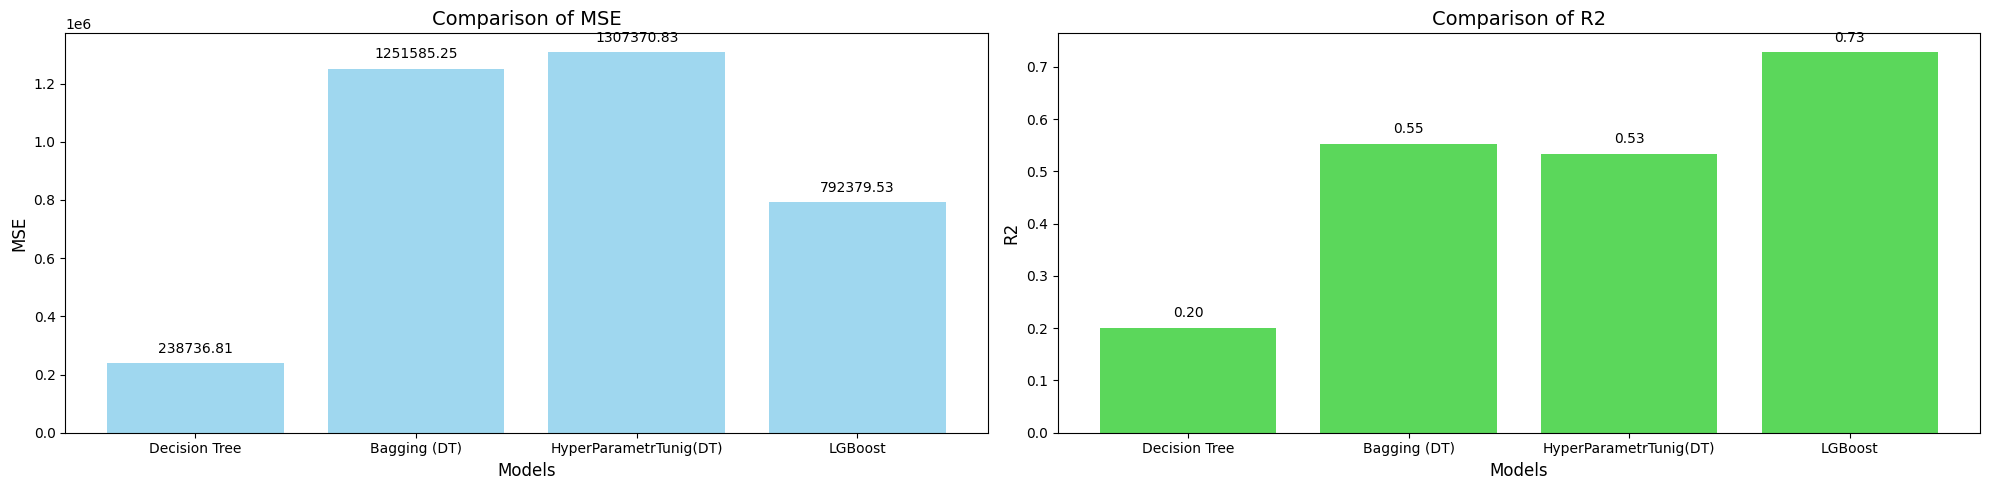

In [12]:
models = ['Decision Tree', 'Bagging (DT)', 'HyperParametrTunig(DT)', 'LGBoost']
metrics = ['MSE', 'R2']
mse = [238736.8131542644, 1251585.2461680584, 1307370.8348141292, 792379.530078057]
r2 = [0.2007347424100695, 0.5531638206436467, 0.5332474630722597, 0.7278728855231209]

data = [mse, r2]

colors = ['skyblue', 'limegreen']

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

for i, (metrics, values) in enumerate(zip(metrics, data)):
  ax = axes[i]
  ax.bar(models, values, color=colors[i], alpha=0.8)
  ax.set_title(f'Comparison of {metrics}', fontsize=14)
  ax.set_ylabel(metrics, fontsize=12)
  ax.set_xlabel('Models', fontsize=12)

  for j, value in enumerate(values):
    ax.text(j, value + 0.02 *max(values), f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()
